## Visual Inspection of intersections including waterways shapefiles

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
from haversine import haversine, Unit

In [2]:
water = gpd.read_file('../data/raw/waterways.shp')
water.to_crs(epsg=4326, inplace=True)

In [3]:
documented_points = pd.read_csv('../data/semi-processed/intersections_to_check_final.csv')
# documented_points['road_to'].value_counts()

road_to
Z1031    2
N207     2
R240     2
N102     2
Z1034    2
Z1005    1
R241     1
N204     1
R220     1
R360     1
R310     1
R301     1
R203     1
R170     1
N104     1
Z1065    1
R151     1
Z1048    1
Z1042    1
Z1044    1
Z1402    1
N2       1
N105     1
Z2013    1
Name: count, dtype: int64

In [4]:
documented_points

Unnamed: 0 road  chainage  LRPName        lat        lon  gap  \
0            5   N1   140.251  LRP143a  23.047944  91.365139  NaN   
1            6   N1   145.409  LRP148a  23.009556  91.381360  NaN   
2           10   N2    11.464  LRP012a  23.785333  90.568555  NaN   
3           13   N1     8.763  LRP009a  23.706083  90.521527  NaN   
4           19   N1    45.322  LRP046a  23.530749  90.781610  NaN   
5           21   N1    47.224  LRP047a  23.530694  90.792444  NaN   
6           22   N1    55.477  LRP056c  23.512667  90.871416  NaN   
7           27   N1    81.846  LRP084a  23.478972  91.118166  NaN   
8           30   N1   128.009  LRP130a  23.149694  91.325499  NaN   
9           31   N1   138.869  LRP142a  23.061472  91.361667  NaN   
10          33   N1   149.289  LRP152a  22.987777  91.410000  NaN   
11          34   N1   149.585  LRP152b  22.985889  91.412056  NaN   
12          37   N1   167.683  LRP170b  22.894000  91.534694  NaN   
13          44   N1   247.923  LRP251b  22.310611  91.857083  NaN   
14          50   N1   264.237  LRP268c  22.291833  91.982333  NaN   
15          64   N1   337.310  LRP341b  21.721555  92.083083  NaN   
16          77   N2    11.977  LRP012d  23.785666  90.570583  NaN   
17          79   N2    30.225  LRP030b  23.893416  90.664417  NaN   
18          81   N2    43.097  LRP043b  23.980222  90.733389  NaN   
19          85   N2    70.576  LRP071a  24.055389  90.982860  NaN   
20          87   N2    85.823  LRP086a  24.050833  91.114444  NaN   
21          88   N2    86.413  LRP087a  24.057694  91.115139  NaN   
22          89   N2   116.294  LRP117b  24.147861  91.346444  NaN   
23          91   N2   141.308  LRP142b  24.267694  91.476888  NaN   
24          92   N2   145.961  LRP146b  24.294722  91.510083  NaN   
25          93   N2   181.657  LRP182c  24.591055  91.601417  NaN   
26          94   N2   185.770  LRP186d  24.613417  91.631249  NaN   
27          95   N2   190.892  LRP191b  24.626499  91.677499  NaN   
28          99   N2   225.373  LRP225b  24.867305  91.856806  NaN   

                              type  \
0                        crossroad   
1               crossroad / kmpost   
2                        crossroad   
3                    sideroad,left   
4                   sideroad,right   
5                   sideroad,right   
6                    sideroad,left   
7                    sideroad,left   
8                   sideroad,right   
9                   sideroad,right   
10                   sideroad,left   
11                  sideroad,right   
12                   sideroad,left   
13                   sideroad,left   
14                  sideroad,right   
15                   sideroad,left   
16                  sideroad,right   
17          sideroad,left / kmpost   
18                   sideroad,left   
19                   sideroad,left   
20                  sideroad,right   
21                   sideroad,left   
22                  sideroad,right   
23  sideroad,left / sideroad,right   
24                  sideroad,right   
25                   sideroad,left   
26                   sideroad,left   
27                  sideroad,right   
28                  sideroad,right   

                                                 name road_to  \
0                                               Z1031   Z1031   
1            Intersection with N104 / Km post missing    N104   
2                              Intersection with N105    N105   
3                                 Road to Sylhet (N2)      N2   
4                               Z1402, road to Pennai   Z1402   
5                                               Z1044   Z1044   
6                         Z1042, road to Bancharampur   Z1042   
7                          Road to Brahmanbaria(N102)    N102   
8                           Road to Nangolhat (Z1048)   Z1048   
9                            Road to Karerhat (Z1031)   Z1031   
10                          Road to Feni Town (Z1034)   Z1034   
11          

In [5]:
probable_points = pd.read_csv('../data/semi-processed/probable_intersections_to_check_final.csv')
probable_points

Unnamed: 0 road  LRPName        lat        lon  chainage            type  \
0           0   N1     LRPS  23.706028  90.443333     0.000          Others   
1        2429   N1  LRP094a  23.419138  91.172194    91.583       CrossRoad   
2        7224   N1  LRP231a  22.399611  91.757333   228.406  SideRoad,Right   
3       14767   N2   LRP037  23.922666  90.703639    36.266          KmPost   
4       10966   N2  LRP229a  24.878666  91.877138   227.988         Culvert   

  road_to closest_lrp  closest_lat  closest_lon  closest_chainage  \
0      N8        LRPS    23.702139    90.435361             0.000   
1    R140     LRP004a    23.419166    91.172333             4.745   
2   Z1084        LRPE    22.397583    91.750917            70.593   
3    R114      LRP028    23.919749    90.704778            26.789   
4    R250     LRP002a    24.878860    91.877249             1.389   

  closest_type                                       closest_name  \
0       Others  Start of road Infront of Padma CNG Station ,Dh...   
1    CrossRoad                    Intersection N1 at Paduar Bazar   
2       Others                     The road ends connecting Z1016   
3       KmPost                                    Km post missing   
4    CrossRoad                                     N2 (Over pass)   

   distance_to_closest  
0           919.684490  
1            14.505865  
2           697.136864  
3           344.363315  
4            24.348922

In [6]:
roads = pd.read_csv('../data/raw/_roads3.csv')
roads.rename(columns={'lrp':'LRPName'}, inplace=True)
roads

road  chainage  LRPName        lat        lon  gap       type  \
0         N1     0.000     LRPS  23.706028  90.443333  NaN     Others   
1         N1     0.814    LRPSa  23.702917  90.450417  NaN    Culvert   
2         N1     0.822    LRPSb  23.702778  90.450472  NaN  CrossRoad   
3         N1     1.000   LRP001  23.702139  90.451972  NaN     KmPost   
4         N1     2.000   LRP002  23.697889  90.460583  NaN     KmPost   
...      ...       ...      ...        ...        ...  ...        ...   
51343  Z8943     7.000   LRP007  22.429499  90.785722  NaN     KmPost   
51344  Z8943     8.000   LRP008  22.430110  90.776333  NaN     KmPost   
51345  Z8943     8.133  LRP008a  22.430249  90.774888   BS     Bridge   
51346  Z8943     8.151  LRP008b  22.430249  90.774860   BE     Bridge   
51347  Z8943     8.800     LRPE  22.430166  90.768916  NaN     Others   

                                                    name  
0      Start of Road  after Jatrabari Flyover infront...  
1                                            Box Culvert  
2                                Intersection with Z1101  
3                                        Km post missing  
4                                        Km post missing  
...                                                  ...  
51343                                    Km Post Missing  
51344                                    Km Post Missing  
51345                                    Start of Bridge  
51346                                      End of Bridge  
51347  End at Kunjerhat Bazar and intersct with R890,...  

[51348 rows x 8 columns]

In [7]:
# Make a function that considers which rows to plot out of a dataframe
def plot_intersection_data(df, start_idx, end_idx, buffer_size):
    for idx, row in df[start_idx:end_idx].iterrows():
        # Create a bounding box geometry for each pair of coordinates
        min_lon = min(row['lon'], row['closest_lon']) - buffer_size
        min_lat = min(row['lat'], row['closest_lat']) - buffer_size
        max_lon = max(row['lon'], row['closest_lon']) + buffer_size
        max_lat = max(row['lat'], row['closest_lat']) + buffer_size
        
        # Only waterways withing the bounds
        water_in_box = water.cx[min_lon:max_lon, min_lat:max_lat]
        
        # Plot waterways for the bound-box thingy
        water_in_box.plot(color='blue', linewidth=0.9)  # Plot waterways
        
        # Make clear what each pair is and what the distance between the pointsis
        print('Intersection', idx,' between ', row['road'],' and ',row['road_to'] )
        print('Distance inbetween points: ',row['distance_to_closest'])
        print('Coordinates point 1:', row['closest_lat'],row['closest_lon'])
        print('Coordinates point 2:', row['lat'],row['lon'])
        
        # Plot both roads you wanted each other color, not blue
        road = row['road']
        road_to = row['road_to']
        plt.plot(roads[roads['road']==road]['lon'], roads[roads['road']==road]['lat'], color='green')  # Plot road
        plt.plot(roads[roads['road']==road_to]['lon'], roads[roads['road']==road_to]['lat'], color='red')  # Plot road_to
        
        # Plot the coordinate points in the road colors
        plt.plot(row['lon'], row['lat'], 'go', label='lat, lon point')  # Plot lat, lon point
        plt.plot(row['closest_lon'], row['closest_lat'], 'ro', label='closest_lat, closest_lon point')  # Plot closest_lat, closest_lon point
        
        # Show within the boundaries aka bounding box
        bounding_box = box(min_lon, min_lat, max_lon, max_lat)
        x, y = bounding_box.exterior.xy
        plt.plot(x, y, color='blue', alpha=0.7)
        
        # Set plot limits according to the bounding box
        plt.xlim(min_lon, max_lon)
        plt.ylim(min_lat, max_lat)
        
        plt.show()

Intersection 0  between  N1  and  Z1031
Distance inbetween points:  4.2007967579342536
Coordinates point 1: 23.0479719 91.3651667
Coordinates point 2: 23.0479441 91.3651389


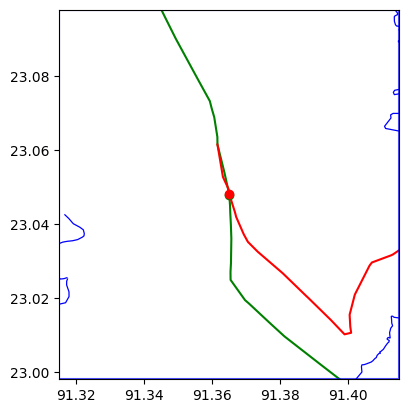

Intersection 1  between  N1  and  N104
Distance inbetween points:  9.07835180330034
Coordinates point 1: 23.0095278 91.3814438
Coordinates point 2: 23.0095556 91.3813604


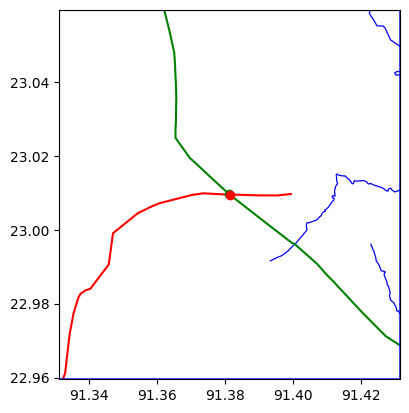

Intersection 2  between  N2  and  N105
Distance inbetween points:  29.759390807779774
Coordinates point 1: 23.7851941 90.5688049
Coordinates point 2: 23.785333 90.5685549


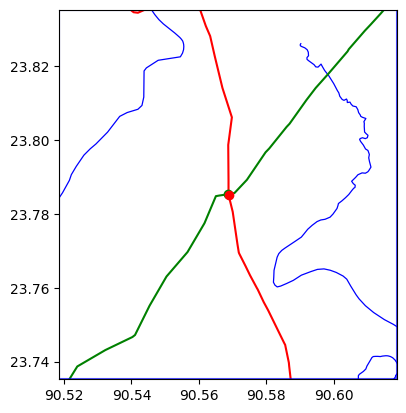

Intersection 3  between  N1  and  N2
Distance inbetween points:  20.37415958669164
Coordinates point 1: 23.7059167 90.5214438
Coordinates point 2: 23.7060833 90.5215271


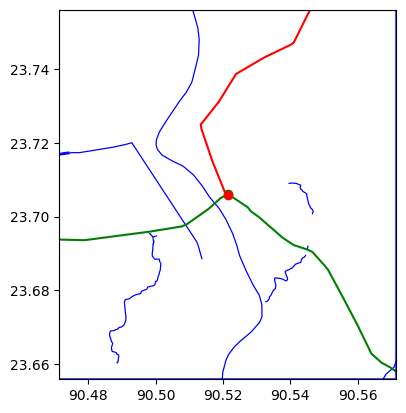

Intersection 4  between  N1  and  Z1402
Distance inbetween points:  0.0
Coordinates point 1: 23.5307493 90.7816104
Coordinates point 2: 23.5307493 90.7816104


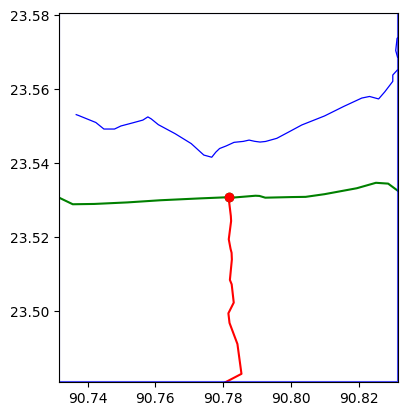

Intersection 5  between  N1  and  Z1044
Distance inbetween points:  0.0
Coordinates point 1: 23.5306938 90.7924441
Coordinates point 2: 23.5306938 90.7924441


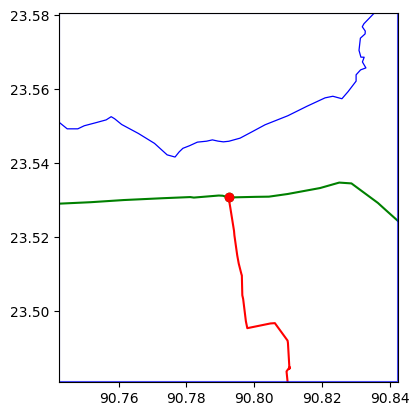

Intersection 6  between  N1  and  Z1042
Distance inbetween points:  3.091223230548948
Coordinates point 1: 23.5126389 90.871416
Coordinates point 2: 23.5126667 90.871416


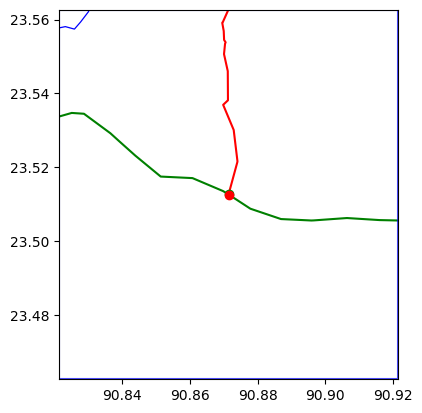

Intersection 7  between  N1  and  N102
Distance inbetween points:  2.835289605490322
Coordinates point 1: 23.4789716 91.1181938
Coordinates point 2: 23.4789716 91.118166


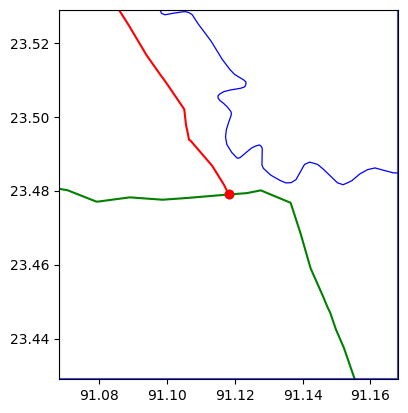

Intersection 8  between  N1  and  Z1048
Distance inbetween points:  31.38744302329569
Coordinates point 1: 23.1497219 91.3251938
Coordinates point 2: 23.1496941 91.3254993


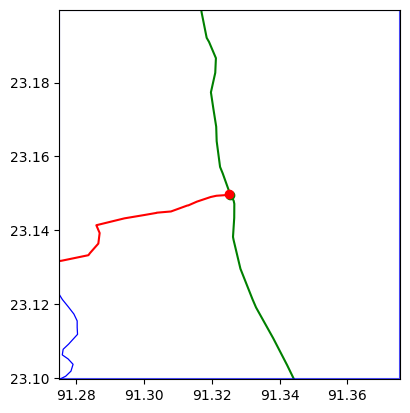

Intersection 9  between  N1  and  Z1031
Distance inbetween points:  0.0
Coordinates point 1: 23.0614722 91.3616667
Coordinates point 2: 23.0614722 91.3616667


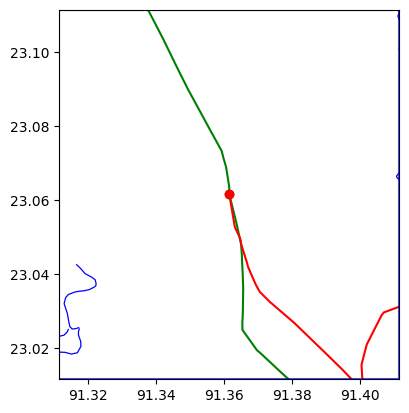

Intersection 10  between  N1  and  Z1034
Distance inbetween points:  14.218481429853732
Coordinates point 1: 22.9877774 91.4101389
Coordinates point 2: 22.9877774 91.41


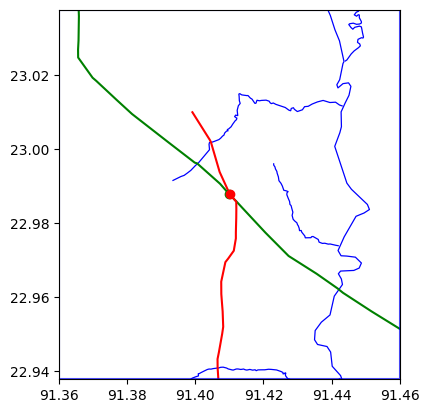

Intersection 11  between  N1  and  Z1034
Distance inbetween points:  8.403367761776074
Coordinates point 1: 22.985833 91.412
Coordinates point 2: 22.9858886 91.4120556


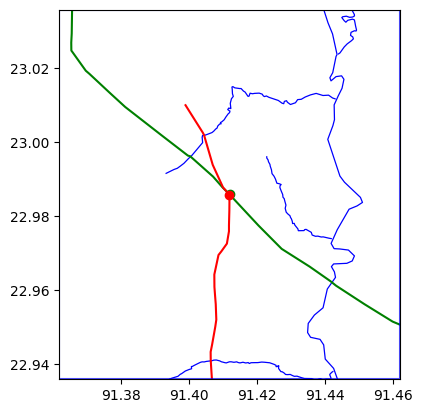

Intersection 12  between  N1  and  R151
Distance inbetween points:  6.171326952959844
Coordinates point 1: 22.8940552 91.5346941
Coordinates point 2: 22.8939997 91.5346941


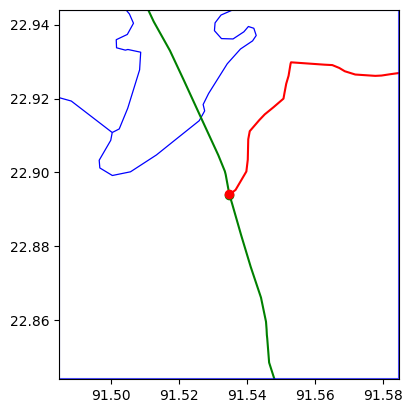

Intersection 13  between  N1  and  Z1065
Distance inbetween points:  31.022092597676345
Coordinates point 1: 22.3103333 91.8571111
Coordinates point 2: 22.3106111 91.8570833


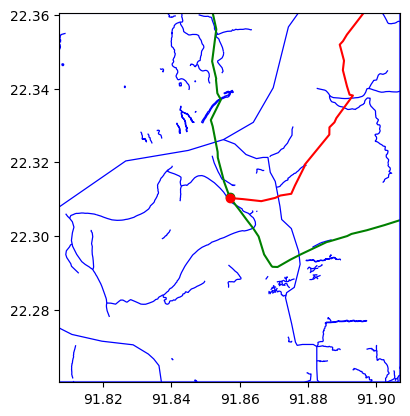

Intersection 14  between  N1  and  R170
Distance inbetween points:  0.0
Coordinates point 1: 22.291833 91.9823327
Coordinates point 2: 22.291833 91.9823327


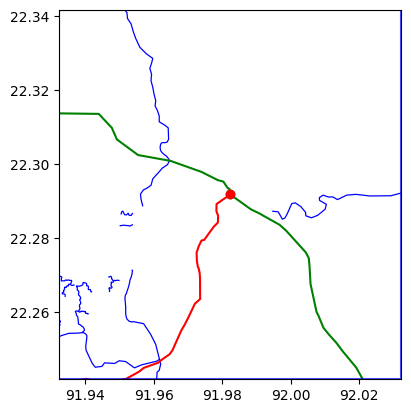

Intersection 15  between  N1  and  Z1005
Distance inbetween points:  3.091223230548948
Coordinates point 1: 21.7215271 92.0830827
Coordinates point 2: 21.7215549 92.0830827


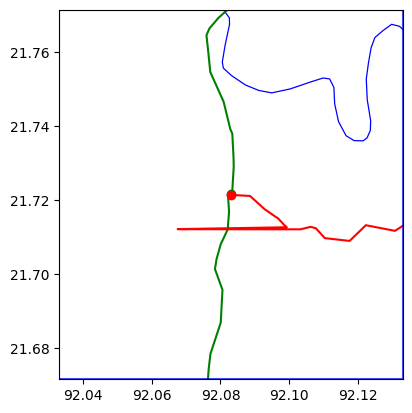

Intersection 16  between  N2  and  R203
Distance inbetween points:  6.788709578026401
Coordinates point 1: 23.7856108 90.5705549
Coordinates point 2: 23.7856663 90.5705827


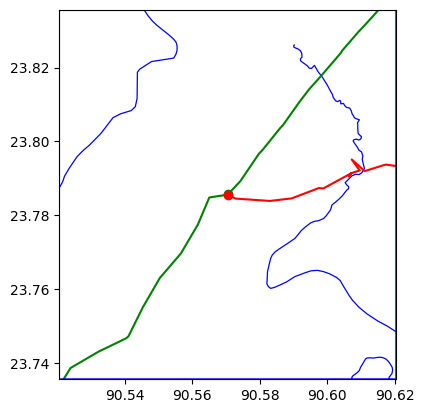

Intersection 17  between  N2  and  R301
Distance inbetween points:  22.922190345818905
Coordinates point 1: 23.8935552 90.6645833
Coordinates point 2: 23.8934163 90.6644167


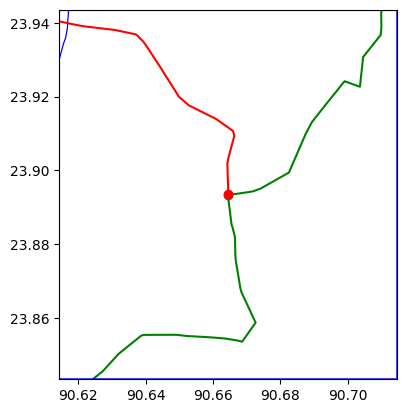

Intersection 18  between  N2  and  R310
Distance inbetween points:  11.739378422458543
Coordinates point 1: 23.9802493 90.7332771
Coordinates point 2: 23.9802216 90.7333886


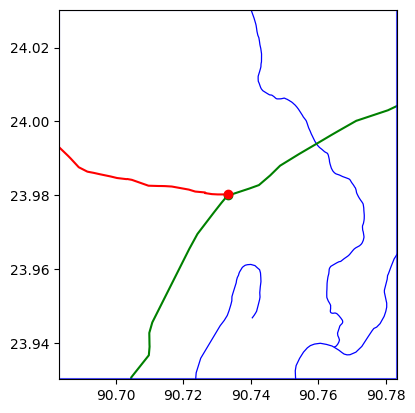

Intersection 19  between  N2  and  R360
Distance inbetween points:  22.91398430619546
Coordinates point 1: 24.05525 90.9830271
Coordinates point 2: 24.0553889 90.9828604


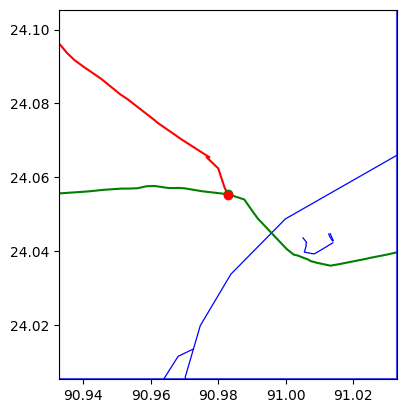

Intersection 20  between  N2  and  N102
Distance inbetween points:  33.46625731367054
Coordinates point 1: 24.0506111 91.1146667
Coordinates point 2: 24.0508333 91.1144444


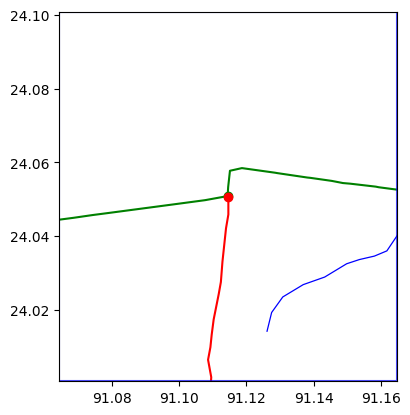

Intersection 21  between  N2  and  R220
Distance inbetween points:  10.47007358155812
Coordinates point 1: 24.0576389 91.1150556
Coordinates point 2: 24.0576944 91.1151389


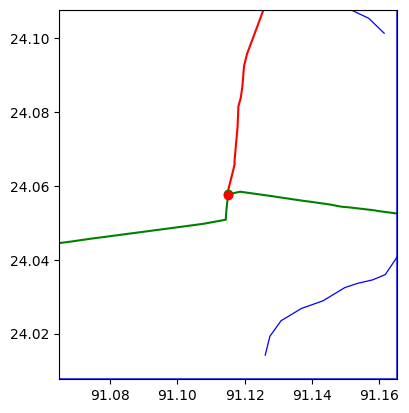

In [8]:
plot_intersection_data( documented_points,0, 22, 0.05)

Intersection 22  between  N2  and  N204
Distance inbetween points:  18.004837785974672
Coordinates point 1: 24.1479163 91.3466108
Coordinates point 2: 24.1478608 91.3464441


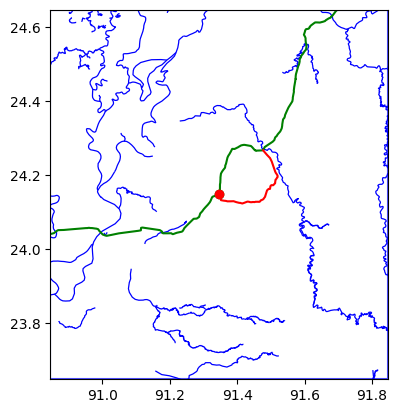

In [9]:
plot_intersection_data(documented_points,22, 23, 0.5)

Intersection 23  between  N2  and  R240
Distance inbetween points:  9.273669691646845
Coordinates point 1: 24.2676104 91.4768882
Coordinates point 2: 24.2676938 91.4768882


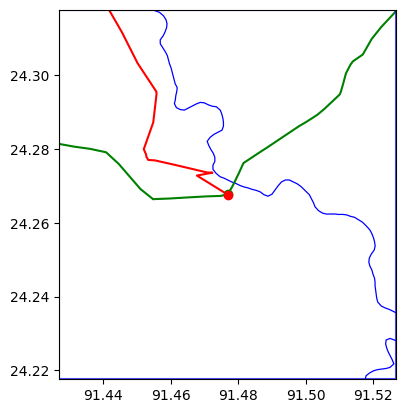

Intersection 24  between  N2  and  N207
Distance inbetween points:  22.890557516366083
Coordinates point 1: 24.2948608 91.51025
Coordinates point 2: 24.2947219 91.5100833


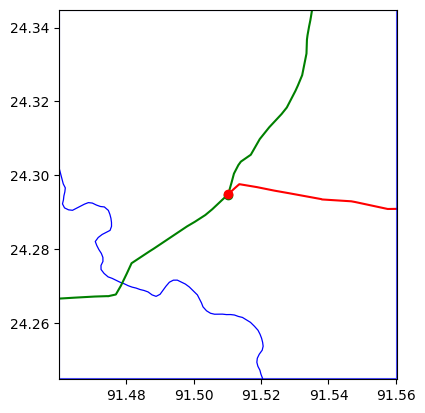

Intersection 25  between  N2  and  R240
Distance inbetween points:  66.79772220490295
Coordinates point 1: 24.5914997 91.6018611
Coordinates point 2: 24.5910552 91.6014167


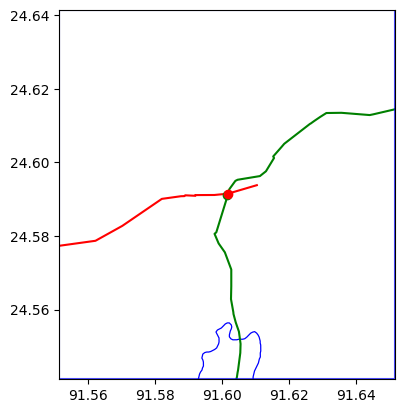

Intersection 26  between  N2  and  R241
Distance inbetween points:  0.0
Coordinates point 1: 24.6134167 91.6312493
Coordinates point 2: 24.6134167 91.6312493


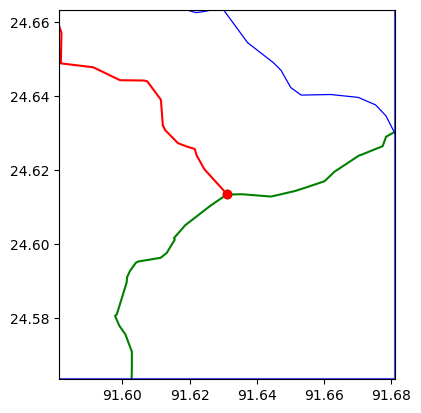

Intersection 27  between  N2  and  N207
Distance inbetween points:  18.737016056778035
Coordinates point 1: 24.6263327 91.6775271
Coordinates point 2: 24.6264993 91.6774993


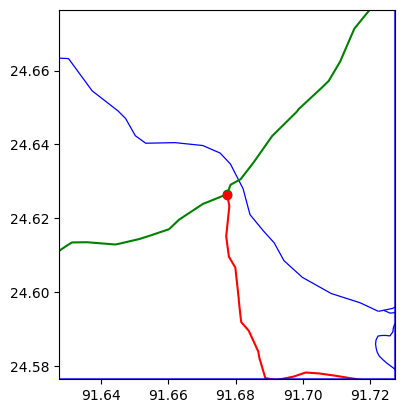

Intersection 28  between  N2  and  Z2013
Distance inbetween points:  0.0
Coordinates point 1: 24.8673049 91.8568056
Coordinates point 2: 24.8673049 91.8568056


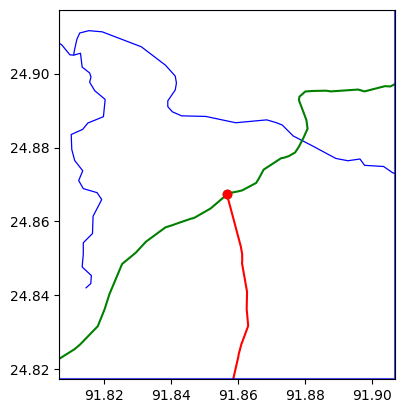

In [10]:
plot_intersection_data(documented_points, 23, 29, 0.05)

## Conclusion:
Of all considered intersection points in the assignment, only the intersection between N1 and Z1065 will not get considered.

In [11]:
documented_points_final = documented_points.drop(13, inplace=False)

In [12]:
documented_points_final['road_to'].value_counts()

road_to
Z1031    2
N207     2
R240     2
N102     2
Z1034    2
R203     1
R241     1
N204     1
R220     1
R360     1
R310     1
R301     1
R170     1
Z1005    1
N104     1
R151     1
Z1048    1
Z1042    1
Z1044    1
Z1402    1
N2       1
N105     1
Z2013    1
Name: count, dtype: int64

## Make plots for all the probable intersections

Intersection 0  between  N1  and  N8
Distance inbetween points:  919.6844900123208
Coordinates point 1: 23.7021389 90.4353608
Coordinates point 2: 23.7060278 90.443333


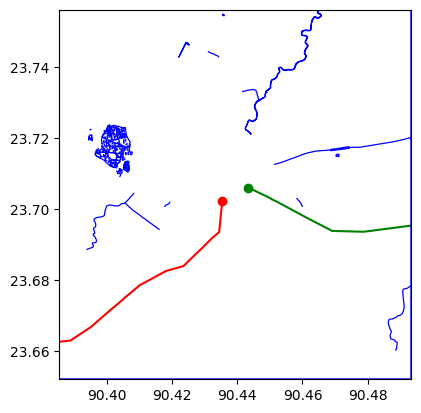

Intersection 1  between  N1  and  R140
Distance inbetween points:  14.505865055780376
Coordinates point 1: 23.419166 91.1723327
Coordinates point 2: 23.4191382 91.1721938


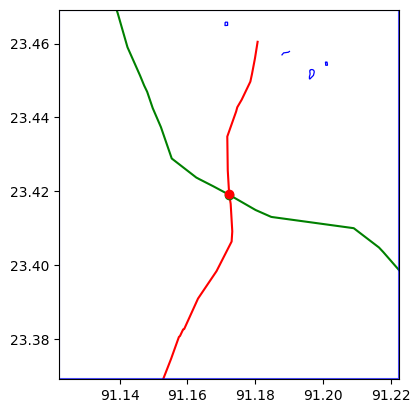

Intersection 2  between  N1  and  Z1084
Distance inbetween points:  697.1368642278308
Coordinates point 1: 22.397583 91.7509167
Coordinates point 2: 22.3996108 91.7573333


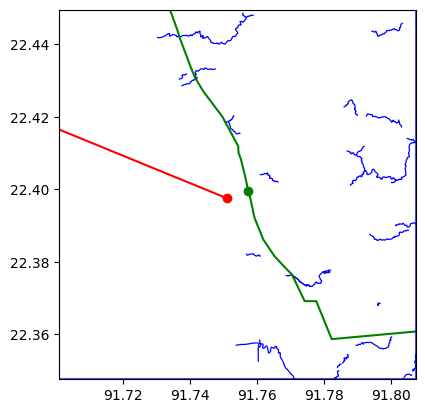

Intersection 3  between  N2  and  R114
Distance inbetween points:  344.36331502073995
Coordinates point 1: 23.9197493 90.7047778
Coordinates point 2: 23.922666 90.7036389


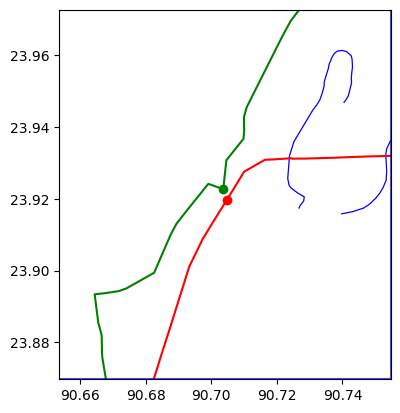

Intersection 4  between  N2  and  R250
Distance inbetween points:  24.34892176439548
Coordinates point 1: 24.8788604 91.8772493
Coordinates point 2: 24.878666 91.8771382


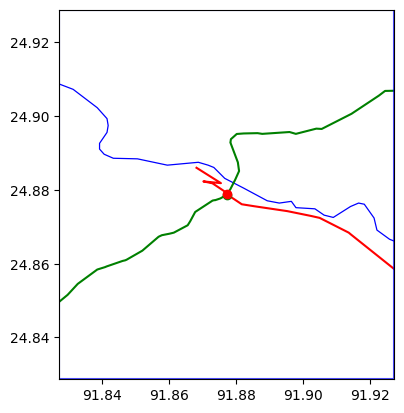

In [13]:
plot_intersection_data(probable_points, 0, 5, 0.05)

## Inspect ind 1 and 4 closer:

Intersection 1  between  N1  and  R140
Distance inbetween points:  14.505865055780376
Coordinates point 1: 23.419166 91.1723327
Coordinates point 2: 23.4191382 91.1721938


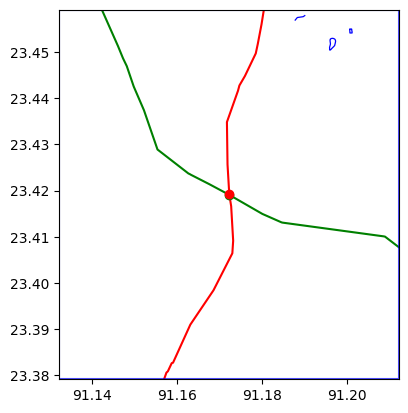

In [14]:
plot_intersection_data(probable_points, 1, 2, 0.04)

Intersection 4  between  N2  and  R250
Distance inbetween points:  24.34892176439548
Coordinates point 1: 24.8788604 91.8772493
Coordinates point 2: 24.878666 91.8771382


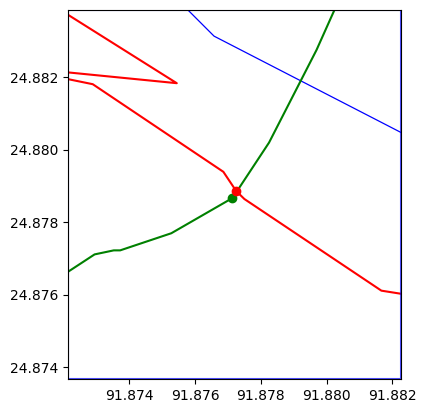

In [15]:
plot_intersection_data(probable_points, 4, 5, 0.005)

## Conclusion
From the visually inspected probable intersections, only 2 are going to be considered in the dataset: the intersection between N1-R140 and N2-R250 due to their short distances and the absence of water bodies inbetween them according to the shapefiles.

Although there were also no waterbodies inbetween the remaining three intersections, their long distance (hundreds of kilometers) resulted into them being removed from the dataset.

In [16]:
probable_points

Unnamed: 0 road  LRPName        lat        lon  chainage            type  \
0           0   N1     LRPS  23.706028  90.443333     0.000          Others   
1        2429   N1  LRP094a  23.419138  91.172194    91.583       CrossRoad   
2        7224   N1  LRP231a  22.399611  91.757333   228.406  SideRoad,Right   
3       14767   N2   LRP037  23.922666  90.703639    36.266          KmPost   
4       10966   N2  LRP229a  24.878666  91.877138   227.988         Culvert   

  road_to closest_lrp  closest_lat  closest_lon  closest_chainage  \
0      N8        LRPS    23.702139    90.435361             0.000   
1    R140     LRP004a    23.419166    91.172333             4.745   
2   Z1084        LRPE    22.397583    91.750917            70.593   
3    R114      LRP028    23.919749    90.704778            26.789   
4    R250     LRP002a    24.878860    91.877249             1.389   

  closest_type                                       closest_name  \
0       Others  Start of road Infront of Padma CNG Station ,Dh...   
1    CrossRoad                    Intersection N1 at Paduar Bazar   
2       Others                     The road ends connecting Z1016   
3       KmPost                                    Km post missing   
4    CrossRoad                                     N2 (Over pass)   

   distance_to_closest  
0           919.684490  
1            14.505865  
2           697.136864  
3           344.363315  
4            24.348922

In [17]:
probable_points_final = probable_points.drop([0,2,3], inplace=False)
probable_points_final

Unnamed: 0 road  LRPName        lat        lon  chainage       type  \
1        2429   N1  LRP094a  23.419138  91.172194    91.583  CrossRoad   
4       10966   N2  LRP229a  24.878666  91.877138   227.988    Culvert   

  road_to closest_lrp  closest_lat  closest_lon  closest_chainage  \
1    R140     LRP004a    23.419166    91.172333             4.745   
4    R250     LRP002a    24.878860    91.877249             1.389   

  closest_type                     closest_name  distance_to_closest  
1    CrossRoad  Intersection N1 at Paduar Bazar            14.505865  
4    CrossRoad                   N2 (Over pass)            24.348922

## Make plots for the extra intersection points

In [18]:
extra_intersections = pd.read_csv('../data/semi-processed/probable_crossings_extra.csv')
extra_intersections

Unnamed: 0 road  LRPName        lat        lon  chainage  \
0        2428   N1   LRP094  23.419527  91.171416    91.493   
1       10961   N2   LRP228  24.877110  91.872944   227.493   
2       10962   N2  LRP228a  24.877222  91.873527   227.568   
3       10963   N2  LRP228b  24.877222  91.873722   227.587   
4       10964   N2  LRP228c  24.877694  91.875277   227.756   
5       10965   N2   LRP229  24.877849  91.875574   227.793   
6       10967   N2  LRP229b  24.880194  91.878249   228.186   
7       10968   N2  LRP229c  24.882749  91.879694   228.504   

                             type road_to closest_lrp  closest_lat  \
0                          KmPost    R140     LRP004a    23.419166   
1                          KmPost    R250      LRP002    24.879388   
2                          Bridge    R250      LRP002    24.879388   
3                          Bridge    R250      LRP002    24.879388   
4  SideRoad,Left / SideRoad,Right    R250     LRP002a    24.878860   
5                          KmPost    R250     LRP002a    24.878860   
6                          Bridge    R250      LRP002    24.879388   
7                          Bridge    R250      LRP001    24.881833   

   closest_lon  closest_chainage closest_type  \
0    91.172333             4.745    CrossRoad   
1    91.876860             1.315       KmPost   
2    91.876860             1.315       KmPost   
3    91.876860             1.315       KmPost   
4    91.877249             1.389    CrossRoad   
5    91.877249             1.389    CrossRoad   
6    91.876860             1.315       KmPost   
7    91.875444             1.000       KmPost   

                      closest_name  distance_to_closest  
0  Intersection N1 at Paduar Bazar           101.789456  
1                  Golapganj 15 km           469.307508  
2                  Golapganj 15 km           413.648937  
3                  Golapganj 15 km           397.863741  
4                   N2 (Over pass)           237.503563  
5                   N2 (Over pass)           203.014909  
6                  Golapganj 15 km           166.294850  
7                  Km post missing           440.660341

Intersection 0  between  N1  and  R140
Distance inbetween points:  101.78945610468584
Coordinates point 1: 23.419166 91.1723327
Coordinates point 2: 23.4195271 91.171416


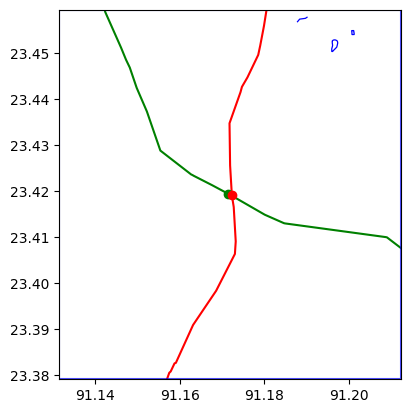

Intersection 1  between  N2  and  R250
Distance inbetween points:  469.30750834349993
Coordinates point 1: 24.8793882 91.8768604
Coordinates point 2: 24.8771104 91.8729438


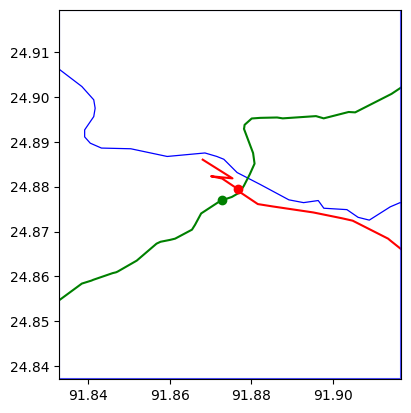

Intersection 2  between  N2  and  R250
Distance inbetween points:  413.64893720911175
Coordinates point 1: 24.8793882 91.8768604
Coordinates point 2: 24.8772216 91.8735271


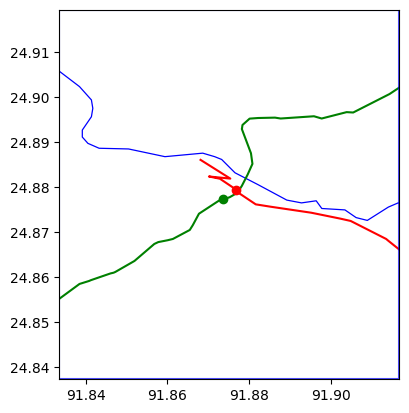

Intersection 3  between  N2  and  R250
Distance inbetween points:  397.8637413649497
Coordinates point 1: 24.8793882 91.8768604
Coordinates point 2: 24.8772216 91.8737216


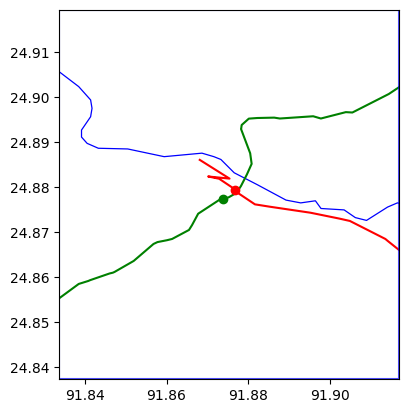

Intersection 4  between  N2  and  R250
Distance inbetween points:  237.50356335274736
Coordinates point 1: 24.8788604 91.8772493
Coordinates point 2: 24.8776938 91.8752771


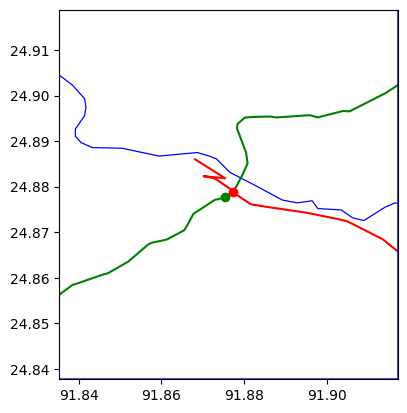

Intersection 5  between  N2  and  R250
Distance inbetween points:  203.01490875338592
Coordinates point 1: 24.8788604 91.8772493
Coordinates point 2: 24.87784884913793 91.87557391336208


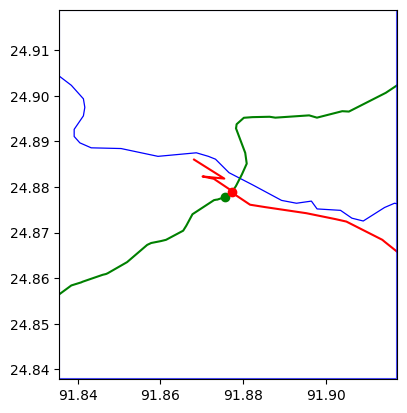

Intersection 6  between  N2  and  R250
Distance inbetween points:  166.29484971818658
Coordinates point 1: 24.8793882 91.8768604
Coordinates point 2: 24.8801938 91.8782493


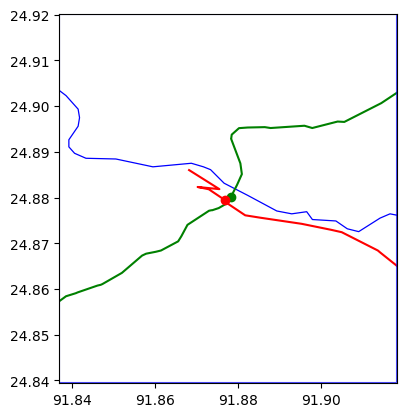

Intersection 7  between  N2  and  R250
Distance inbetween points:  440.6603408653793
Coordinates point 1: 24.8818327 91.8754438
Coordinates point 2: 24.8827493 91.8796938


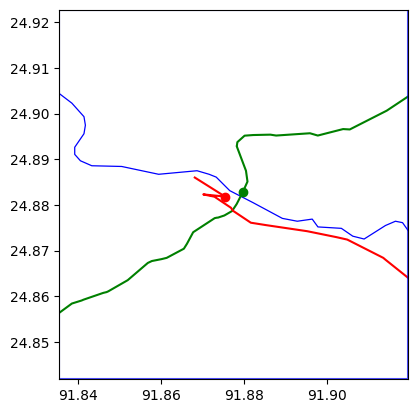

In [19]:
plot_intersection_data(extra_intersections,0, 8, 0.04)

Keep indexes 0, maar ook niet 0 want die is al meegenomen met de documented.

In [20]:
# extra_points_final = extra_intersections.loc[[0]]
# extra_points_final

# Concat the final intersection points

In [21]:
inspected_intersections = pd.concat([documented_points_final, probable_points_final], ignore_index=True)

In [22]:
inspected_intersections.drop(inspected_intersections.columns[:1], axis=1, inplace=True)
inspected_intersections

road  chainage  LRPName        lat        lon  gap  \
0    N1   140.251  LRP143a  23.047944  91.365139  NaN   
1    N1   145.409  LRP148a  23.009556  91.381360  NaN   
2    N2    11.464  LRP012a  23.785333  90.568555  NaN   
3    N1     8.763  LRP009a  23.706083  90.521527  NaN   
4    N1    45.322  LRP046a  23.530749  90.781610  NaN   
5    N1    47.224  LRP047a  23.530694  90.792444  NaN   
6    N1    55.477  LRP056c  23.512667  90.871416  NaN   
7    N1    81.846  LRP084a  23.478972  91.118166  NaN   
8    N1   128.009  LRP130a  23.149694  91.325499  NaN   
9    N1   138.869  LRP142a  23.061472  91.361667  NaN   
10   N1   149.289  LRP152a  22.987777  91.410000  NaN   
11   N1   149.585  LRP152b  22.985889  91.412056  NaN   
12   N1   167.683  LRP170b  22.894000  91.534694  NaN   
13   N1   264.237  LRP268c  22.291833  91.982333  NaN   
14   N1   337.310  LRP341b  21.721555  92.083083  NaN   
15   N2    11.977  LRP012d  23.785666  90.570583  NaN   
16   N2    30.225  LRP030b  23.893416  90.664417  NaN   
17   N2    43.097  LRP043b  23.980222  90.733389  NaN   
18   N2    70.576  LRP071a  24.055389  90.982860  NaN   
19   N2    85.823  LRP086a  24.050833  91.114444  NaN   
20   N2    86.413  LRP087a  24.057694  91.115139  NaN   
21   N2   116.294  LRP117b  24.147861  91.346444  NaN   
22   N2   141.308  LRP142b  24.267694  91.476888  NaN   
23   N2   145.961  LRP146b  24.294722  91.510083  NaN   
24   N2   181.657  LRP182c  24.591055  91.601417  NaN   
25   N2   185.770  LRP186d  24.613417  91.631249  NaN   
26   N2   190.892  LRP191b  24.626499  91.677499  NaN   
27   N2   225.373  LRP225b  24.867305  91.856806  NaN   
28   N1    91.583  LRP094a  23.419138  91.172194  NaN   
29   N2   227.988  LRP229a  24.878666  91.877138  NaN   

                              type  \
0                        crossroad   
1               crossroad / kmpost   
2                        crossroad   
3                    sideroad,left   
4                   sideroad,right   
5                   sideroad,right   
6                    sideroad,left   
7                    sideroad,left   
8                   sideroad,right   
9                   sideroad,right   
10                   sideroad,left   
11                  sideroad,right   
12                   sideroad,left   
13                  sideroad,right   
14                   sideroad,left   
15                  sideroad,right   
16          sideroad,left / kmpost   
17                   sideroad,left   
18                   sideroad,left   
19                  sideroad,right   
20                   sideroad,left   
21                  sideroad,right   
22  sideroad,left / sideroad,right   
23                  sideroad,right   
24                   sideroad,left   
25                   sideroad,left   
26                  sideroad,right   
27                  sideroad,right   
28                       CrossRoad   
29                         Culvert   

                                                 name road_to  \
0                                               Z1031   Z1031   
1            Intersection with N104 / Km post missing    N104   
2                              Intersection with N105    N105   
3                                 Road to Sylhet (N2)      N2   
4                               Z1402, road to Pennai   Z1402   
5                                               Z1044   Z1044   
6                         Z1042, road to Bancharampur   Z1042   
7                          Road to Brahmanbaria(N102)    N102   
8                           Road to Nangolhat (Z1048)   Z1048   
9                            Road to Karerhat (Z1031)   Z1031   
10                          Road to Feni Town (Z1034)   Z1034   
11                           Road to Sonagazi (Z1034)   Z1034   
12                            Road to Karerhat (R151)    R151   
13                             Road to Anowara (R170)    R170   
14                            Road to Alikadam(Z1005)   Z1005   
15              

In [23]:
# inspected_intersections.columns

In [24]:
inspected_intersections_df = inspected_intersections.copy()
new_rows = []
# Iterate over each row in the intersections that are documented and above the threshold
for index, row in inspected_intersections_df.iterrows():
    # Extract coordinates of the intersection [on the N1 or N2]
    intersection_coords = (row['lat'], row['lon'])
    # Filter roads df to get points on road_to
    road_to_points = roads[roads['road'] == row['road_to']]
    # Create a new row with information about the closest point
    new_row = {
        'road': row['road_to'],
        'LRPName': row['closest_lrp'],
        'chainage':row['closest_chainage'],
        'lat' :row['closest_lat'],
        'lon' :row['closest_lon'],
        'type':row['closest_type'],
        'name':row['closest_name'],
        'distance_to_closest': row['distance_to_closest'],
        'road_to':row['road'],
        'closest_lrp':row['LRPName'],
        'closest_chainage':row['chainage'],
        'closest_lat': row['lat'],
        'closest_lon': row['lon'],
        'closest_type':row['type'],
        'closest_name':row['name'],
        'intersection':row['model_type']
    }
    
    new_rows.append(new_row)

intersection_point_small_road = pd.DataFrame(new_rows)

# Concatenate intersections as mentioned  on N1orN2  with intersections as mentioned in the smaller roads
documented_intersections_final = pd.concat([inspected_intersections_df, intersection_point_small_road], ignore_index=True)

documented_intersections_final[('model_type')]= 'intersection'
documented_intersections_final

road  chainage  LRPName        lat        lon  gap  \
0      N1   140.251  LRP143a  23.047944  91.365139  NaN   
1      N1   145.409  LRP148a  23.009556  91.381360  NaN   
2      N2    11.464  LRP012a  23.785333  90.568555  NaN   
3      N1     8.763  LRP009a  23.706083  90.521527  NaN   
4      N1    45.322  LRP046a  23.530749  90.781610  NaN   
5      N1    47.224  LRP047a  23.530694  90.792444  NaN   
6      N1    55.477  LRP056c  23.512667  90.871416  NaN   
7      N1    81.846  LRP084a  23.478972  91.118166  NaN   
8      N1   128.009  LRP130a  23.149694  91.325499  NaN   
9      N1   138.869  LRP142a  23.061472  91.361667  NaN   
10     N1   149.289  LRP152a  22.987777  91.410000  NaN   
11     N1   149.585  LRP152b  22.985889  91.412056  NaN   
12     N1   167.683  LRP170b  22.894000  91.534694  NaN   
13     N1   264.237  LRP268c  22.291833  91.982333  NaN   
14     N1   337.310  LRP341b  21.721555  92.083083  NaN   
15     N2    11.977  LRP012d  23.785666  90.570583  NaN   
16     N2    30.225  LRP030b  23.893416  90.664417  NaN   
17     N2    43.097  LRP043b  23.980222  90.733389  NaN   
18     N2    70.576  LRP071a  24.055389  90.982860  NaN   
19     N2    85.823  LRP086a  24.050833  91.114444  NaN   
20     N2    86.413  LRP087a  24.057694  91.115139  NaN   
21     N2   116.294  LRP117b  24.147861  91.346444  NaN   
22     N2   141.308  LRP142b  24.267694  91.476888  NaN   
23     N2   145.961  LRP146b  24.294722  91.510083  NaN   
24     N2   181.657  LRP182c  24.591055  91.601417  NaN   
25     N2   185.770  LRP186d  24.613417  91.631249  NaN   
26     N2   190.892  LRP191b  24.626499  91.677499  NaN   
27     N2   225.373  LRP225b  24.867305  91.856806  NaN   
28     N1    91.583  LRP094a  23.419138  91.172194  NaN   
29     N2   227.988  LRP229a  24.878666  91.877138  NaN   
30  Z1031     1.496  LRP001b  23.047972  91.365167  NaN   
31   N104     1.878  LRP001a  23.009528  91.381444  NaN   
32   N105    12.803  LRP012a  23.785194  90.568805  NaN   
33     N2     0.000     LRPS  23.705917  90.521444  NaN   
34  Z1402    43.849     LRPE  23.530749  90.781610  NaN   
35  Z1044     0.000     LRPS  23.530694  90.792444  NaN   
36  Z1042     0.000     LRPS  23.512639  90.871416  NaN   
37   N102     0.000     LRPS  23.478972  91.118194  NaN   
38  Z1048    31.130     LRPE  23.149722  91.325194  NaN   
39  Z1031     0.000     LRPS  23.061472  91.361667  NaN   
40  Z1034     2.652  LRP002a  22.987777  91.410139  NaN   
41  Z1034     2.710  LRP002b  22.985833  91.412000  NaN   
42   R151     0.000     LRPS  22.894055  91.534694  NaN   
43   R170     0.000     LRPS  22.291833  91.982333  NaN   
44  Z1005     0.000     LRPS  21.721527  92.083083  NaN   
45   R203     0.000     LRPS  23.785611  90.570555  NaN   
46   R301    33.037     LRPE  23.893555  90.664583  NaN   
47   R310    37.339     LRPE  23.980249  90.733277  NaN   
48   R360   116.385     LRPE  24.055250  90.983027  NaN   
49   N102    82.682     LRPE  24.050611  91.114667  NaN   
50   R220     0.000     LRPS  24.057639  91.115056  NaN   
51   N204     0.000     LRPS  24.147916  91.346611  NaN   
52   R240     0.000     LRPS  24.267610  91.476888  NaN   
53   N207     0.000     LRPS  24.294861  91.510250  NaN   
54   R240    49.420  LRP049a  24.591500  91.601861  NaN   
55   R241     0.000     LRPS  24.613417  91.631249  NaN   
56   N207    67.985     LRPE  24.626333  91.677527  NaN   
57  Z2013     0.000     LRPS  24.867305  91.856806  NaN   
58   R140     4.745  LRP004a  23.419166  91.172333  NaN   
59   R250     1.389  LRP002a  24.878860  91.877249  NaN   

                              type  \
0                        crossroad   
1               crossroad / kmpost   
2                        crossroad   
3                    sideroad,left   
4                   sideroad,right   
5                   sideroad,right   
6                    sideroad,left   
7                    sideroad,left   
8                   sideroad,right   
9                   sider

In [25]:
documented_intersections_final[['road','LRPName','road_to','closest_lrp','lat','closest_lat','lon','closest_lon']]

road  LRPName road_to closest_lrp        lat  closest_lat        lon  \
0      N1  LRP143a   Z1031     LRP001b  23.047944    23.047972  91.365139   
1      N1  LRP148a    N104     LRP001a  23.009556    23.009528  91.381360   
2      N2  LRP012a    N105     LRP012a  23.785333    23.785194  90.568555   
3      N1  LRP009a      N2        LRPS  23.706083    23.705917  90.521527   
4      N1  LRP046a   Z1402        LRPE  23.530749    23.530749  90.781610   
5      N1  LRP047a   Z1044        LRPS  23.530694    23.530694  90.792444   
6      N1  LRP056c   Z1042        LRPS  23.512667    23.512639  90.871416   
7      N1  LRP084a    N102        LRPS  23.478972    23.478972  91.118166   
8      N1  LRP130a   Z1048        LRPE  23.149694    23.149722  91.325499   
9      N1  LRP142a   Z1031        LRPS  23.061472    23.061472  91.361667   
10     N1  LRP152a   Z1034     LRP002a  22.987777    22.987777  91.410000   
11     N1  LRP152b   Z1034     LRP002b  22.985889    22.985833  91.412056   
12     N1  LRP170b    R151        LRPS  22.894000    22.894055  91.534694   
13     N1  LRP268c    R170        LRPS  22.291833    22.291833  91.982333   
14     N1  LRP341b   Z1005        LRPS  21.721555    21.721527  92.083083   
15     N2  LRP012d    R203        LRPS  23.785666    23.785611  90.570583   
16     N2  LRP030b    R301        LRPE  23.893416    23.893555  90.664417   
17     N2  LRP043b    R310        LRPE  23.980222    23.980249  90.733389   
18     N2  LRP071a    R360        LRPE  24.055389    24.055250  90.982860   
19     N2  LRP086a    N102        LRPE  24.050833    24.050611  91.114444   
20     N2  LRP087a    R220        LRPS  24.057694    24.057639  91.115139   
21     N2  LRP117b    N204        LRPS  24.147861    24.147916  91.346444   
22     N2  LRP142b    R240        LRPS  24.267694    24.267610  91.476888   
23     N2  LRP146b    N207        LRPS  24.294722    24.294861  91.510083   
24     N2  LRP182c    R240     LRP049a  24.591055    24.591500  91.601417   
25     N2  LRP186d    R241        LRPS  24.613417    24.613417  91.631249   
26     N2  LRP191b    N207        LRPE  24.626499    24.626333  91.677499   
27     N2  LRP225b   Z2013        LRPS  24.867305    24.867305  91.856806   
28     N1  LRP094a    R140     LRP004a  23.419138    23.419166  91.172194   
29     N2  LRP229a    R250     LRP002a  24.878666    24.878860  91.877138   
30  Z1031  LRP001b      N1     LRP143a  23.047972    23.047944  91.365167   
31   N104  LRP001a      N1     LRP148a  23.009528    23.009556  91.381444   
32   N105  LRP012a      N2     LRP012a  23.785194    23.785333  90.568805   
33     N2     LRPS      N1     LRP009a  23.705917    23.706083  90.521444   
34  Z1402     LRPE      N1     LRP046a  23.530749    23.530749  90.781610   
35  Z1044     LRPS      N1     LRP047a  23.530694    23.530694  90.792444   
36  Z1042     LRPS      N1     LRP056c  23.512639    23.512667  90.871416   
37   N102     LRPS      N1     LRP084a  23.478972    23.478972  91.118194   
38  Z1048     LRPE      N1     LRP130a  23.149722    23.149694  91.325194   
39  Z1031     LRPS      N1     LRP142a  23.061472    23.061472  91.361667   
40  Z1034  LRP002a      N1     LRP152a  22.987777    22.987777  91.410139   
41  Z1034  LRP002b      N1     LRP152b  22.985833    22.985889  91.412000   
42   R151     LRPS      N1     LRP170b  22.894055    22.894000  91.534694   
43   R170     LRPS      N1     LRP268c  22.291833    22.291833  91.982333   
44  Z1005     LRPS      N1     LRP341b  21.721527    21.721555  92.083083   
45   R203     LRPS      N2     LRP012d  23.785611    23.785666  90.570555   
46   R301     LRPE      N2     LRP030b  23.893555    23.893416  90.664583   
47   R310     LRPE      N2     LRP043b  23.980249    23.980222  90.733277   
48   R360     LRPE      N2     LRP071a  24.055250    24.055389  90.983027   
49   N102     LRPE      N2     LRP086a  24.050611    24.050833  91.114667   
50   R220     LRPS      N2     LRP087a  24.057639    24.057694  91.115056   
5

In [26]:
roads_in_simulation = documented_intersections_final.road.unique().tolist()
roads_in_simulation

['N1',
 'N2',
 'Z1031',
 'N104',
 'N105',
 'Z1402',
 'Z1044',
 'Z1042',
 'N102',
 'Z1048',
 'Z1034',
 'R151',
 'R170',
 'Z1005',
 'R203',
 'R301',
 'R310',
 'R360',
 'R220',
 'N204',
 'R240',
 'N207',
 'R241',
 'Z2013',
 'R140',
 'R250']

## Now lets merge the intersection points with the start/end points

In [27]:
start_end = pd.DataFrame()

for r in roads['road'].unique():
    road_of_interest = roads[roads['road']==r]
    first_row = road_of_interest.head(1)
    last_row = road_of_interest.tail(1)
    start_end = pd.concat([start_end, first_row, last_row])
    
start_end = start_end.reset_index(drop=True)
start_end['model_type']= 'sourcesink'
start_end

road  chainage LRPName        lat        lon  gap    type  \
0        N1     0.000    LRPS  23.706028  90.443333  NaN  Others   
1        N1   462.254    LRPE  20.862917  92.298083  NaN  Others   
2      N101     0.000    LRPS  23.454139  91.212861  NaN  Others   
3      N101     6.021    LRPE  23.459306  91.253389  NaN  Others   
4      N102     0.000    LRPS  23.478972  91.118194  NaN  Others   
...     ...       ...     ...        ...        ...  ...     ...   
1689  Z8915    15.660    LRPE  22.599694  90.753167  NaN  Others   
1690  Z8916     0.000    LRPS  22.625499  90.661722  NaN  Others   
1691  Z8916    11.591    LRPE  22.597889  90.746666  NaN  Others   
1692  Z8943     0.000    LRPS  22.426444  90.849472  NaN  Others   
1693  Z8943     8.800    LRPE  22.430166  90.768916  NaN  Others   

                                                   name  model_type  
0     Start of Road  after Jatrabari Flyover infront...  sourcesink  
1     End of Road at Shapla Chattar ,Teknaf Meet wit...  sourcesink  
2                   Start of Road from N120 at Balutopa  sourcesink  
3                        End of road Bibir bazar Bridge  sourcesink  
4                       Start of road from N1 Mainamati  sourcesink  
...                                                 ...         ...  
1689                  End of road at Daulatkhan, Bhola.  sourcesink  
1690          Start from R890 at Guingerhat Bazar Dhola  sourcesink  
1691      End at Selim Chattar at Intersect with Z8915.  sourcesink  
1692  Start at intersection of Z8905 /BC joint infro...  sourcesink  
1693  End at Kunjerhat Bazar and intersct with R890,...  sourcesink  

[1694 rows x 9 columns]

In [28]:
start_end_intersections = start_end[start_end['road'].isin(roads_in_simulation)]
start_end_intersections

road  chainage LRPName        lat        lon  gap             type  \
0       N1     0.000    LRPS  23.706028  90.443333  NaN           Others   
1       N1   462.254    LRPE  20.862917  92.298083  NaN           Others   
4     N102     0.000    LRPS  23.478972  91.118194  NaN           Others   
5     N102    82.682    LRPE  24.050611  91.114667  NaN           Others   
8     N104     0.000    LRPS  23.009667  91.399416  NaN           Others   
9     N104    49.630    LRPE  22.825749  91.101444  NaN           Others   
10    N105     0.000    LRPS  23.690416  90.546611  NaN           Others   
11    N105    48.870  LRP048  23.989527  90.358222  NaN  KmPost / Others   
36      N2     0.000    LRPS  23.705917  90.521444  NaN           Others   
37      N2   286.516    LRPE  25.157056  92.017638  NaN           Others   
40    N204     0.000    LRPS  24.147916  91.346611  NaN           Others   
41    N204    34.421    LRPE  24.267388  91.477138  NaN           Others   
46    N207     0.000    LRPS  24.294861  91.510250  NaN           Others   
47    N207    67.985    LRPE  24.626333  91.677527  NaN           Others   
188   R140     0.000    LRPS  23.460472  91.180722  NaN           Others   
189   R140   138.630    LRPE  22.944777  91.104722  NaN           Others   
202   R151     0.000    LRPS  22.894055  91.534694  NaN           Others   
203   R151    47.702    LRPE  22.708222  91.784083  NaN           Others   
216   R170     0.000    LRPS  22.291833  91.982333  NaN           Others   
217   R170    74.635    LRPE  21.752167  92.007833  NaN           Others   
228   R203     0.000    LRPS  23.785611  90.570555  NaN           Others   
229   R203    76.197    LRPE  23.903306  91.126583  NaN           Others   
236   R220     0.000    LRPS  24.057639  91.115056  NaN           Others   
237   R220    51.772    LRPE  24.373166  91.416139  NaN           Others   
242   R240     0.000    LRPS  24.267610  91.476888  NaN           Others   
243   R240    50.670    LRPE  24.593805  91.610472  NaN           Others   
244   R241     0.000    LRPS  24.613417  91.631249  NaN           Others   
245   R241    45.015    LRPE  24.923360  91.462583  NaN           Others   
252   R250     0.000    LRPS  24.886000  91.868138  NaN           Others   
253   R250    89.700    LRPE  24.873138  92.365028  NaN           Others   
264   R301     0.000    LRPS  23.892777  90.402028  NaN           Others   
265   R301    33.037    LRPE  23.893555  90.664583  NaN           Others   
270   R310     0.000    LRPS  23.989500  90.381916  NaN           Others   
271   R310    37.339    LRPE  23.980249  90.733277  NaN           Others   
282   R360     0.000    LRPS  24.762528  90.450444  NaN           Others   
283   R360   116.385    LRPE  24.055250  90.983027  NaN           Others   
418  Z1005     0.000    LRPS  21.721527  92.083083  NaN           Others   
419  Z1005    42.220    LRPE  21.777444  92.194777  NaN           Others   
450  Z1031     0.000    LRPS  23.061472  91.361667  NaN           Others   
451  Z1031    35.935    LRPE  22.929833  91.552778  NaN           Others   
456  Z1034     0.000    LRPS  23.010028  91.399111  NaN           Others   
457  Z1034    29.806    LRPE  22.835972  91.454472  NaN           Others   
472  Z1042     0.000    LRPS  23.512639  90.871416  NaN           Others   
473  Z1042    48.195    LRPE  23.781249  90.828749  NaN           Others   
476  Z1044     0.000    LRPS  23.530694  90.792444  NaN           Others   
477  Z1044    40.356    LRPE  23.250944  90.849750  NaN           Others   
484  Z1048     0.000    LRPS  23.231305  91.120472  NaN           Others   
485  Z1048    31.130    LRPE  23.149722  91.325194  NaN           Others   
602  Z1402     0.000    LRPS  23.259389  90.696500  NaN           Others   
603  Z1402    43.849    LRPE  23.530749  90.781610  NaN           Others   
750  Z2013     0.000    LRPS  24.867305  91.856806  NaN           Others   
751  Z2013    25.045    LRPE  24.657222  91.828222  Na

In [29]:
documented_intersections_start_end = pd.concat([start_end_intersections, documented_intersections_final], ignore_index=True)
documented_intersections_start_end.sort_values(by=['road','chainage', 'model_type'], inplace=True)
documented_intersections_start_end[['road','LRPName','chainage','model_type','intersection','lat','lon', 'road_to','closest_lrp']]

road  LRPName  chainage    model_type  intersection        lat  \
0       N1     LRPS     0.000    sourcesink           NaN  23.706028   
55      N1  LRP009a     8.763  intersection           NaN  23.706083   
56      N1  LRP046a    45.322  intersection           NaN  23.530749   
57      N1  LRP047a    47.224  intersection           NaN  23.530694   
58      N1  LRP056c    55.477  intersection           NaN  23.512667   
..     ...      ...       ...           ...           ...        ...   
86   Z1402     LRPE    43.849  intersection  intersection  23.530749   
49   Z1402     LRPE    43.849    sourcesink           NaN  23.530749   
109  Z2013     LRPS     0.000  intersection  intersection  24.867305   
50   Z2013     LRPS     0.000    sourcesink           NaN  24.867305   
51   Z2013     LRPE    25.045    sourcesink           NaN  24.657222   

           lon road_to closest_lrp  
0    90.443333     NaN         NaN  
55   90.521527      N2        LRPS  
56   90.781610   Z1402        LRPE  
57   90.792444   Z1044        LRPS  
58   90.871416   Z1042        LRPS  
..         ...     ...         ...  
86   90.781610      N1     LRP046a  
49   90.781610     NaN         NaN  
109  91.856806      N2     LRP225b  
50   91.856806     NaN         NaN  
51   91.828222     NaN         NaN  

[112 rows x 9 columns]

In [30]:
documented_intersections_start_end.model_type.value_counts()

model_type
intersection    60
sourcesink      52
Name: count, dtype: int64

In [31]:
def merge_intersourcesinks(df):
    # Identify duplicate rows in order to check them
    duplicates = df.duplicated(subset=['road', 'LRPName', 'chainage', 'lat', 'lon'], keep=False)
    duplicated_rows = df[duplicates].copy()
    # Keep only the rows with duplicates in a separate dataframe
    keepers  = df.copy()
    keepers.drop(duplicated_rows.index, inplace=True)    

    for index, row in duplicated_rows.iterrows():
        # Find the index of the row to be kept
        keep_index = duplicated_rows.loc[(duplicated_rows['road'] == row['road']) &
                                          (duplicated_rows['LRPName'] == row['LRPName']) &
                                          (duplicated_rows['chainage'] == row['chainage']) &
                                          (duplicated_rows['lat'] == row['lat']) &
                                          (duplicated_rows['lon'] == row['lon']) &
                                          (duplicated_rows['model_type'] == 'intersection')].index
    
        # Change the model_type of the row to 'intersourcesink'
        duplicated_rows.loc[keep_index, 'model_type'] = 'intersourcesink'
        
    interss = duplicated_rows[duplicated_rows['model_type']=='intersourcesink']
    
    final_df = pd.concat([keepers, interss], ignore_index=True)

    return final_df

In [32]:
documented_intersections_start_end_final = merge_intersourcesinks(documented_intersections_start_end)
documented_intersections_start_end_final.sort_values(by=['road', 'chainage'], inplace=True)
documented_intersections_start_end_final

road  chainage  LRPName        lat        lon  gap            type  \
0      N1     0.000     LRPS  23.706028  90.443333  NaN          Others   
1      N1     8.763  LRP009a  23.706083  90.521527  NaN   sideroad,left   
2      N1    45.322  LRP046a  23.530749  90.781610  NaN  sideroad,right   
3      N1    47.224  LRP047a  23.530694  90.792444  NaN  sideroad,right   
4      N1    55.477  LRP056c  23.512667  90.871416  NaN   sideroad,left   
..    ...       ...      ...        ...        ...  ...             ...   
87  Z1048    31.130     LRPE  23.149722  91.325194  NaN          Others   
66  Z1402     0.000     LRPS  23.259389  90.696500  NaN          Others   
88  Z1402    43.849     LRPE  23.530749  90.781610  NaN          Others   
89  Z2013     0.000     LRPS  24.867305  91.856806  NaN          Others   
67  Z2013    25.045     LRPE  24.657222  91.828222  NaN          Others   

                                                 name       model_type  \
0   Start of Road  after Jatrabari Flyover infront...       sourcesink   
1                                 Road to Sylhet (N2)     intersection   
2                               Z1402, road to Pennai     intersection   
3                                               Z1044     intersection   
4                         Z1042, road to Bancharampur     intersection   
..                                                ...              ...   
87       End of road at Chewara Intersection with N1.  intersourcesink   
66                            Start of road from R140       sourcesink   
88                             Meet with N1 at Pennai  intersourcesink   
89            Road Start From N2 at Chandipool Sylhet  intersourcesink   
67                      Road End With Borobaga River.       sourcesink   

   road_to  distance_to_closest  closest_lat  closest_lon closest_lrp  \
0      NaN                  NaN          NaN          NaN         NaN   
1       N2            20.374160    23.705917    90.521444        LRPS   
2    Z1402             0.000000    23.530749    90.781610        LRPE   
3    Z1044             0.000000    23.530694    90.792444        LRPS   
4    Z1042             3.091223    23.512639    90.871416        LRPS   
..     ...                  ...          ...          ...         ...   
87      N1            31.387443    23.149694    91.325499     LRP130a   
66     NaN                  NaN          NaN          NaN         NaN   
88      N1             0.000000    23.530749    90.781610     LRP046a   
89      N2             0.000000    24.867305    91.856806     LRP225b   
67     NaN                  NaN          NaN          NaN         NaN   

                           closest_name    closest_type  closest_chainage  \
0                                   NaN             NaN               NaN   
1        Road Start from N1 at Katchpur          Others             0.000   
2                Meet with N1 at Pennai          Others            43.849   
3     Start of Road From N1 at Gouripur          Others             0.000   
4   Start of Road from N1 at Eliotganj.          Others             0.000   
..                                  ...             ...               ...   
87            Road to Nangolhat (Z1048)  sideroad,right           128.009   
66                                  NaN             NaN               NaN   
88                Z1402, road to Pennai  sideroad,right            45.322   
89             Road to Balaganj (Z2013)  sideroad,right           225.373   
67                                  NaN             NaN               NaN   

    intersection  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
87  intersection  
66           NaN  
88  intersection  
89  intersection  
67           NaN  

[90 rows x 18 columns]

In [35]:
documented_intersections_start_end_final[(documented_intersections_start_end_final['model_type']=='intersection')|(documented_intersections_start_end_final['model_type']=='intersourcesink')]

road  chainage  LRPName        lat        lon  gap  \
1      N1     8.763  LRP009a  23.706083  90.521527  NaN   
2      N1    45.322  LRP046a  23.530749  90.781610  NaN   
3      N1    47.224  LRP047a  23.530694  90.792444  NaN   
4      N1    55.477  LRP056c  23.512667  90.871416  NaN   
5      N1    81.846  LRP084a  23.478972  91.118166  NaN   
6      N1    91.583  LRP094a  23.419138  91.172194  NaN   
7      N1   128.009  LRP130a  23.149694  91.325499  NaN   
8      N1   138.869  LRP142a  23.061472  91.361667  NaN   
9      N1   140.251  LRP143a  23.047944  91.365139  NaN   
10     N1   145.409  LRP148a  23.009556  91.381360  NaN   
11     N1   149.289  LRP152a  22.987777  91.410000  NaN   
12     N1   149.585  LRP152b  22.985889  91.412056  NaN   
13     N1   167.683  LRP170b  22.894000  91.534694  NaN   
14     N1   264.237  LRP268c  22.291833  91.982333  NaN   
15     N1   337.310  LRP341b  21.721555  92.083083  NaN   
68   N102     0.000     LRPS  23.478972  91.118194  NaN   
69   N102    82.682     LRPE  24.050611  91.114667  NaN   
18   N104     1.878  LRP001a  23.009528  91.381444  NaN   
21   N105    12.803  LRP012a  23.785194  90.568805  NaN   
70     N2     0.000     LRPS  23.705917  90.521444  NaN   
23     N2    11.464  LRP012a  23.785333  90.568555  NaN   
24     N2    11.977  LRP012d  23.785666  90.570583  NaN   
25     N2    30.225  LRP030b  23.893416  90.664417  NaN   
26     N2    43.097  LRP043b  23.980222  90.733389  NaN   
27     N2    70.576  LRP071a  24.055389  90.982860  NaN   
28     N2    85.823  LRP086a  24.050833  91.114444  NaN   
29     N2    86.413  LRP087a  24.057694  91.115139  NaN   
30     N2   116.294  LRP117b  24.147861  91.346444  NaN   
31     N2   141.308  LRP142b  24.267694  91.476888  NaN   
32     N2   145.961  LRP146b  24.294722  91.510083  NaN   
33     N2   181.657  LRP182c  24.591055  91.601417  NaN   
34     N2   185.770  LRP186d  24.613417  91.631249  NaN   
35     N2   190.892  LRP191b  24.626499  91.677499  NaN   
36     N2   225.373  LRP225b  24.867305  91.856806  NaN   
37     N2   227.988  LRP229a  24.878666  91.877138  NaN   
71   N204     0.000     LRPS  24.147916  91.346611  NaN   
72   N207     0.000     LRPS  24.294861  91.510250  NaN   
73   N207    67.985     LRPE  24.626333  91.677527  NaN   
41   R140     4.745  LRP004a  23.419166  91.172333  NaN   
74   R151     0.000     LRPS  22.894055  91.534694  NaN   
75   R170     0.000     LRPS  22.291833  91.982333  NaN   
76   R203     0.000     LRPS  23.785611  90.570555  NaN   
77   R220     0.000     LRPS  24.057639  91.115056  NaN   
78   R240     0.000     LRPS  24.267610  91.476888  NaN   
47   R240    49.420  LRP049a  24.591500  91.601861  NaN   
79   R241     0.000     LRPS  24.613417  91.631249  NaN   
51   R250     1.389  LRP002a  24.878860  91.877249  NaN   
80   R301    33.037     LRPE  23.893555  90.664583  NaN   
81   R310    37.339     LRPE  23.980249  90.733277  NaN   
82   R360   116.385     LRPE  24.055250  90.983027  NaN   
83  Z1005     0.000     LRPS  21.721527  92.083083  NaN   
84  Z1031     0.000     LRPS  23.061472  91.361667  NaN   
57  Z1031     1.496  LRP001b  23.047972  91.365167  NaN   
60  Z1034     2.652  LRP002a  22.987777  91.410139  NaN   
61  Z1034     2.710  LRP002b  22.985833  91.412000  NaN   
85  Z1042     0.000     LRPS  23.512639  90.871416  NaN   
86  Z1044     0.000     LRPS  23.530694  90.792444  NaN   
87  Z1048    31.130     LRPE  23.149722  91.325194  NaN   
88  Z1402    43.849     LRPE  23.530749  90.781610  NaN   
89  Z2013     0.000     LRPS  24.867305  91.856806  NaN   

                              type  \
1                    sideroad,left   
2                   sideroad,right   
3                   sideroad,right   
4                    sideroad,left   
5                    sideroad,left   
6                        CrossRoad   
7                   sideroad,right   
8                   sideroad,right   
9                        crossroad   
10              crossroad

In [33]:
documented_intersections_start_end_final.model_type.value_counts()

model_type
intersection       38
sourcesink         30
intersourcesink    22
Name: count, dtype: int64

In [34]:
# Extract to CSV to use in the 'Handle duplicate bridges' notebook
documented_intersections_start_end_final.to_csv('../data/semi-processed/identified_roads_final.csv')